<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [61]:
import matplotlib.pyplot as plt

% matplotlib inline

In [62]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [63]:
# Concatenate y and X, and overwrite the Boston variable.
boston = pd.concat([y, X], axis=1)
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [64]:
#data shape
boston.shape

(506, 14)

In [65]:
#data types
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [66]:
#count of null values by column
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [67]:
#basic summary statistics
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [68]:
#number of unique values for each column
boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

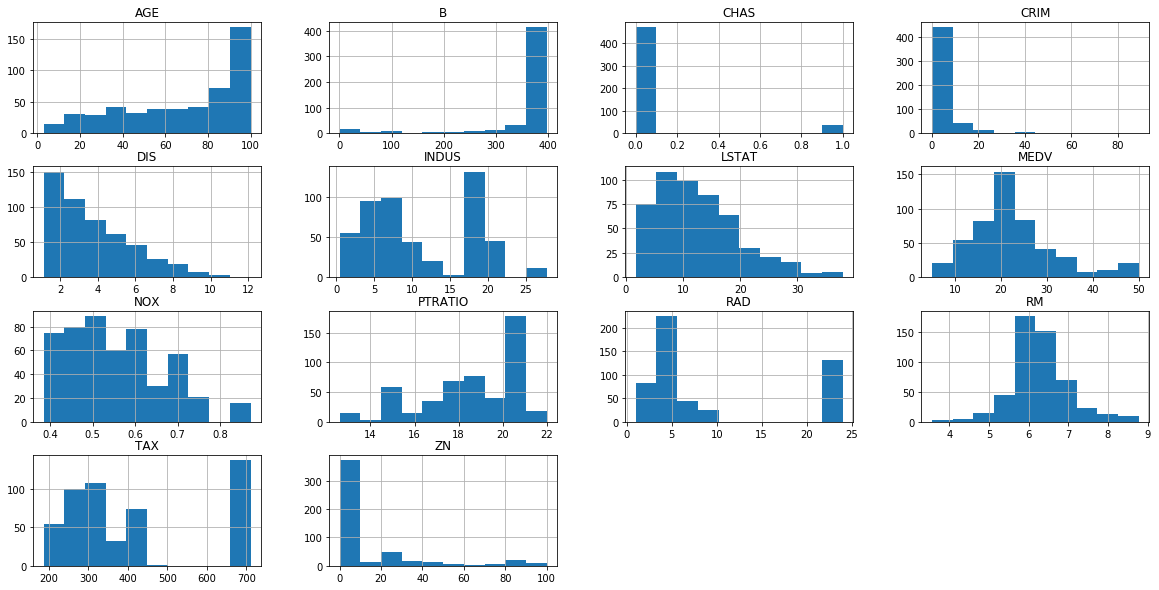

In [69]:
#plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
axes = boston.hist(figsize=(20,10))

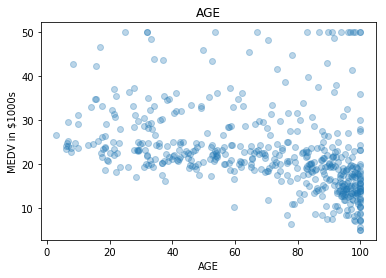

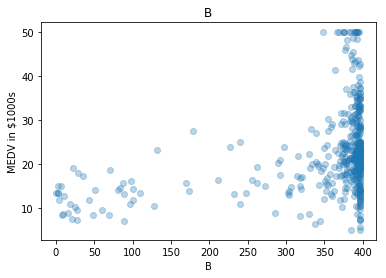

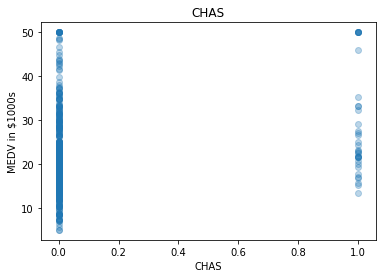

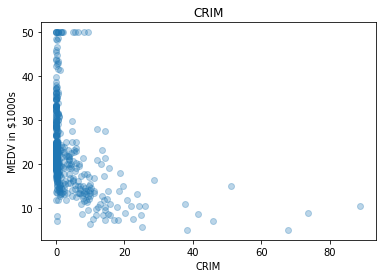

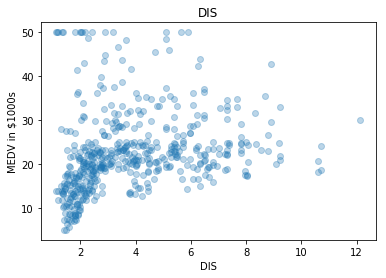

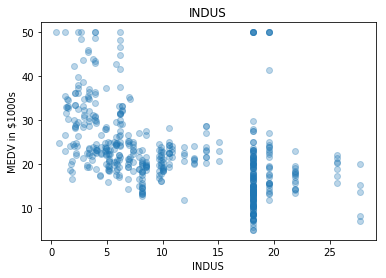

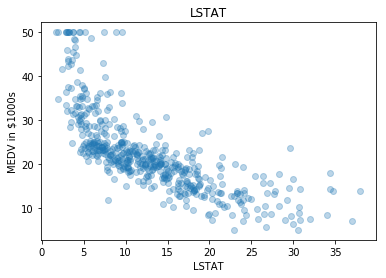

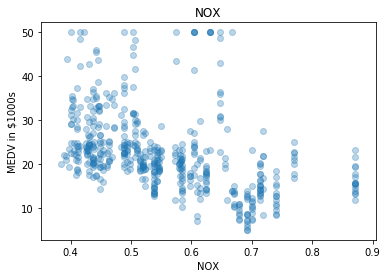

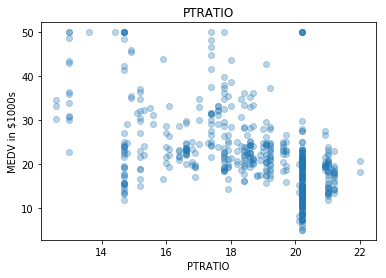

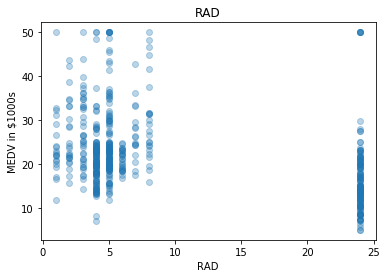

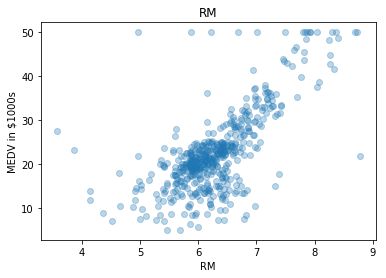

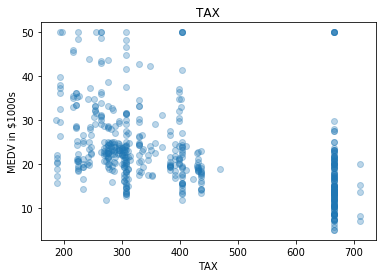

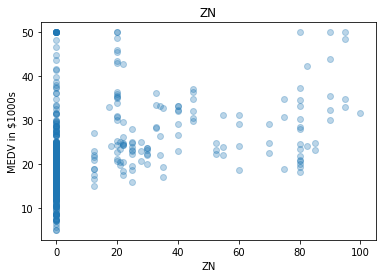

In [70]:
#scatterplot of each column with median price

y = boston.loc[:, 'MEDV']
for var in ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']:
    x = boston.loc[:, var]
    fig, ax = plt.subplots()
    ax.scatter(x, y, alpha=0.3)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('MEDV in $1000s')

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [71]:
from sklearn import metrics

y_pred = np.zeros(y.shape) + boston.loc[:, 'MEDV'].mean()
metrics.mean_squared_error(y, y_pred)

84.419556156165541

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, )

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))

18.8270057337
23.5924251662


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [74]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

kf.split(X, y)

mse_values = []
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    
print('Test MSE:')
print(np.mean(mse_values))

mse_values = []
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index, :])))
    
print('Train MSE:')
print(np.mean(mse_values))

Test MSE:
23.3851832675
Train MSE:
21.7888423047


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model performed much better than the null model by a significant amount. This result means we likely reduced both bias and variance when we used my model versus the null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model performed slightly worse on the test set versus the training set. This means my model might be overfitting slightly which reduces bias but increases variance.

- How much of a bias problem does your model appear to have? Why do you say that?

Because we trained the model on a wide variety of features, I'm going to assume we also intrgrated in bias when including features that don't seem to correlate well with the MEDV.

- How much of a variance problem does your model appear to have? Why do you say that?

Since the result of the k-fold was similar to that of the model on the test and train data, I'm assuming the model doesn't have much variance.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

My model got slightly worse when I dropped a number of the features. (see below)

In [48]:
kf = model_selection.KFold(n_splits=10, shuffle=True)

X = boston.loc[:, ['AGE', 'RM', 'PTRATIO', 'LSTAT']]

kf.split(X, y)

mse_values = []

for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    
print(np.mean(mse_values))

27.7344806059


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

In [51]:
boston.loc[:, 'SQUARE_OF_AGE'] = (boston.loc[:, 'AGE']) ** 2
boston.loc[:, 'SQUARE_OF_RM'] = (boston.loc[:, 'RM']) ** 2

kf = model_selection.KFold(n_splits=10, shuffle=True)

X = boston.loc[:, ['SQUARE_OF_AGE', 'SQUARE_OF_RM', 'PTRATIO', 'LSTAT']]

kf.split(X, y)

mse_values = []

for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    
print(np.mean(mse_values))

26.8886092106


# KNN Practice

In [75]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [76]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [77]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [78]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [79]:
#data shape
iris.shape

(150, 6)

In [80]:
#data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [81]:
#count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [82]:
#basic summary stats
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [83]:
#number of unique values for each column
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

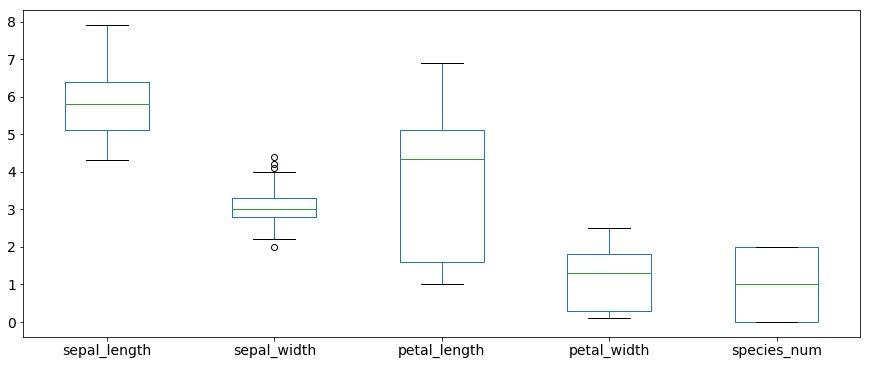

In [84]:
#plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species
ax = iris.plot(kind='box', figsize=(15,6))

- Get the accuracy of a null model that simply predicts the most common species.

In [85]:
#all species occur in the data set the same number of times, so any model would get it right 33% of the time

iris.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
test_scores = cross_val_score(knn, X_test, y_pred_class, cv=10, scoring='accuracy')
print('Accuracy Score for Test Set:', test_scores.mean())

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Accuracy Score for Training Set:', scores.mean())

Accuracy Score for Test Set: 0.876666666667
Accuracy Score for Training Set: 0.935909090909


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model outperformed the null model by a significant amount, with the null model correct 33% of the time and my model correct 87% of the time. This tells me I've likely reduced both variance and bias.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model performed 6% better on the training set versus the test set, which is common as it likely over-fitted the data a little. This would mean that my model has low bias, but the overfitting means higher variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

A variance problem as it looks like it overfitted.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

My model got better by about 8% on the test set and the test accuracy score is now much closer to the training score, which means I've eliminated some variance. (see below)

In [97]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
test_scores = cross_val_score(knn, X_test, y_pred_class, cv=10, scoring='accuracy')
print('Accuracy Score for Test Set:', test_scores.mean())

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Accuracy Score for Training Set:', scores.mean())

Accuracy Score for Test Set: 0.955
Accuracy Score for Training Set: 0.945909090909


- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

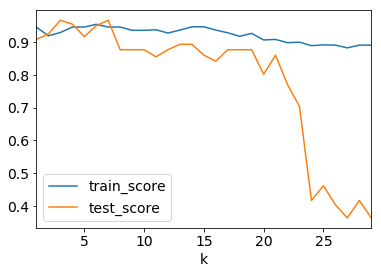

In [104]:
#get train scores
train_scores = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    mean_score = scores.mean()
    train_scores.append([k, mean_score])

scores_df = pd.DataFrame(train_scores, columns=['k', 'train_score'])

#get test scores
test_scores = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    cv_scores = cross_val_score(knn, X_test, y_pred_class, cv=10, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    test_scores.append(mean_cv_score)
    
scores_df.loc[:, 'test_score'] = test_scores

#plot the test and train scores on a graph
ax = scores_df.plot(kind='line', x='k', y='train_score')
scores_df.plot(kind='line', x='k', y='test_score', ax=ax);

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

In [107]:
iris.loc[:, 'petal_length_squared'] = (iris.petal_length) ** 2
iris.loc[:, 'petal_width_squared'] = (iris.petal_width) ** 2

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'petal_length_squared', 'petal_width_squared']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
test_scores = cross_val_score(knn, X_test, y_pred_class, cv=8, scoring='accuracy')
print('Accuracy Score for Test Set:', test_scores.mean())

scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
print('Accuracy Score for Training Set:', scores.mean())

#had to reduce the number of cross validations to 8 because the smallest test set only had 8 values

Accuracy Score for Test Set: 0.975
Accuracy Score for Training Set: 0.962912087912


## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
